In [2]:
#carga de librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.special as special 
from scipy.optimize import curve_fit
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#cargar archivo csv desde seaborn 
df=pd.read_csv('Malta_limpio.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(20)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/50188,Cosy fully renovated farmhouse Gozo,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,Alexandra,2015-09-29,Desconocido,-%,f,...,4.83,4.95,4.95,4.62,4.79,1.0,1.0,0.0,0.0,1.32
1,https://www.airbnb.com/rooms/53723,Studio apartment Apt.3,A tastefully converted open plan apartment who...,"Located right in the heart of Valletta, a worl...",https://a0.muscache.com/pictures/1eeb37c2-16f6...,Michael,2010-10-02,within a few hours,100%,t,...,4.79,4.95,4.97,4.97,4.69,4.0,4.0,0.0,0.0,1.09
2,https://www.airbnb.com/rooms/102120,4 Bedroom Family-run House with Pool,Air conditioning in 3 bedrooms (on a pay-per-u...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,Michael,2011-04-25,within an hour,94%,t,...,4.59,4.89,4.93,4.52,4.80,7.0,7.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/109123,Penthouse Apartment.,Our place is located in a small town called Na...,I can tell where the best places are for break...,https://a0.muscache.com/pictures/724159/6277e4...,Lino And Rose,2011-05-05,within an hour,100%,t,...,4.86,4.96,4.94,4.82,4.90,3.0,3.0,0.0,0.0,0.79
4,https://www.airbnb.com/rooms/113998,Residence Rouge™ 1 Floriana Valletta.,Hi and welcome to Residence Rouge.<br />Our 20...,No se proporcionan detalles,https://a0.muscache.com/pictures/744058/a7f0aa...,Alan,2011-05-11,a few days or more,13%,f,...,4.78,4.84,4.91,4.80,4.69,7.0,7.0,0.0,0.0,1.25
5,https://www.airbnb.com/rooms/114044,1 Luxury well lit double bedroom with balcony.,It is warm and cosy in winter and airy in the ...,"It is very central on the island, a stone's th...",https://a0.muscache.com/pictures/miso/Hosting-...,Paul,2011-05-11,within an hour,100%,t,...,4.76,4.87,5.00,4.69,4.88,2.0,0.0,2.0,0.0,0.97
6,https://www.airbnb.com/rooms/114643,house in the middle of st julians,my house is situated in the heart of st julian...,the neighberhood is very qiuet and a very quie...,https://a0.muscache.com/pictures/44886c81-c369...,Carol,2011-05-12,within an hour,100%,f,...,4.36,4.82,4.87,4.71,4.50,2.0,1.0,1.0,0.0,2.91
7,https://www.airbnb.com/rooms/115387,Catherine's No1 studio -Aircon-,Cool basic studio apartment in the heart of Ma...,Swimming in the clear blue sea. Snorkelling or...,https://a0.muscache.com/pictures/751024/25f099...,Victor,2011-05-11,within an hour,100%,t,...,4.49,4.83,4.74,4.77,4.69,12.0,12.0,0.0,0.0,1.16
8,https://www.airbnb.com/rooms/116725,Villa Joseph,"Located in St Paul's Bay, 600 metres from Qawr...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,TwoRoom,2011-05-15,within an hour,100%,t,...,4.57,4.88,4.92,4.67,4.69,7.0,7.0,0.0,0.0,0.50
9,https://www.airbnb.com/rooms/122193,Furnished room in central Malta,"My place is in central Malta, round the corner...",No se proporcionan detalles,https://a0.muscache.com/pictures/b60ef66f-62f6...,Marco,2011-05-22,within an hour,100%,t,...,4.79,4.91,4.97,4.85,4.92,1.0,0.0,1.0,0.0,0.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12609 entries, 0 to 12608
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   12609 non-null  object 
 1   name                                          12609 non-null  object 
 2   description                                   12609 non-null  object 
 3   neighborhood_overview                         12609 non-null  object 
 4   picture_url                                   12609 non-null  object 
 5   host_name                                     12609 non-null  object 
 6   host_since                                    12609 non-null  object 
 7   host_response_time                            12609 non-null  object 
 8   host_response_rate                            12609 non-null  object 
 9   host_is_superhost                             12609 non-null 

In [5]:
#cargar archivo csv desde seaborn 
df1=pd.read_csv('Malta_limpio.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1.head(20)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/50188,Cosy fully renovated farmhouse Gozo,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,Alexandra,2015-09-29,Desconocido,-%,f,...,4.83,4.95,4.95,4.62,4.79,1.0,1.0,0.0,0.0,1.32
1,https://www.airbnb.com/rooms/53723,Studio apartment Apt.3,A tastefully converted open plan apartment who...,"Located right in the heart of Valletta, a worl...",https://a0.muscache.com/pictures/1eeb37c2-16f6...,Michael,2010-10-02,within a few hours,100%,t,...,4.79,4.95,4.97,4.97,4.69,4.0,4.0,0.0,0.0,1.09
2,https://www.airbnb.com/rooms/102120,4 Bedroom Family-run House with Pool,Air conditioning in 3 bedrooms (on a pay-per-u...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,Michael,2011-04-25,within an hour,94%,t,...,4.59,4.89,4.93,4.52,4.80,7.0,7.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/109123,Penthouse Apartment.,Our place is located in a small town called Na...,I can tell where the best places are for break...,https://a0.muscache.com/pictures/724159/6277e4...,Lino And Rose,2011-05-05,within an hour,100%,t,...,4.86,4.96,4.94,4.82,4.90,3.0,3.0,0.0,0.0,0.79
4,https://www.airbnb.com/rooms/113998,Residence Rouge™ 1 Floriana Valletta.,Hi and welcome to Residence Rouge.<br />Our 20...,No se proporcionan detalles,https://a0.muscache.com/pictures/744058/a7f0aa...,Alan,2011-05-11,a few days or more,13%,f,...,4.78,4.84,4.91,4.80,4.69,7.0,7.0,0.0,0.0,1.25
5,https://www.airbnb.com/rooms/114044,1 Luxury well lit double bedroom with balcony.,It is warm and cosy in winter and airy in the ...,"It is very central on the island, a stone's th...",https://a0.muscache.com/pictures/miso/Hosting-...,Paul,2011-05-11,within an hour,100%,t,...,4.76,4.87,5.00,4.69,4.88,2.0,0.0,2.0,0.0,0.97
6,https://www.airbnb.com/rooms/114643,house in the middle of st julians,my house is situated in the heart of st julian...,the neighberhood is very qiuet and a very quie...,https://a0.muscache.com/pictures/44886c81-c369...,Carol,2011-05-12,within an hour,100%,f,...,4.36,4.82,4.87,4.71,4.50,2.0,1.0,1.0,0.0,2.91
7,https://www.airbnb.com/rooms/115387,Catherine's No1 studio -Aircon-,Cool basic studio apartment in the heart of Ma...,Swimming in the clear blue sea. Snorkelling or...,https://a0.muscache.com/pictures/751024/25f099...,Victor,2011-05-11,within an hour,100%,t,...,4.49,4.83,4.74,4.77,4.69,12.0,12.0,0.0,0.0,1.16
8,https://www.airbnb.com/rooms/116725,Villa Joseph,"Located in St Paul's Bay, 600 metres from Qawr...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,TwoRoom,2011-05-15,within an hour,100%,t,...,4.57,4.88,4.92,4.67,4.69,7.0,7.0,0.0,0.0,0.50
9,https://www.airbnb.com/rooms/122193,Furnished room in central Malta,"My place is in central Malta, round the corner...",No se proporcionan detalles,https://a0.muscache.com/pictures/b60ef66f-62f6...,Marco,2011-05-22,within an hour,100%,t,...,4.79,4.91,4.97,4.85,4.92,1.0,0.0,1.0,0.0,0.90


In [6]:
f1=df1

In [7]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
f1['has_availability'] = f1['has_availability'].replace({'f': 0, 't': 1})
frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


f1['host_response_time'] = f1['host_response_time'].map({
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4,
    'Desconocido' : 5
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_8580\3032408551.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_8580\3032408551.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_8580\3032408551.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed i

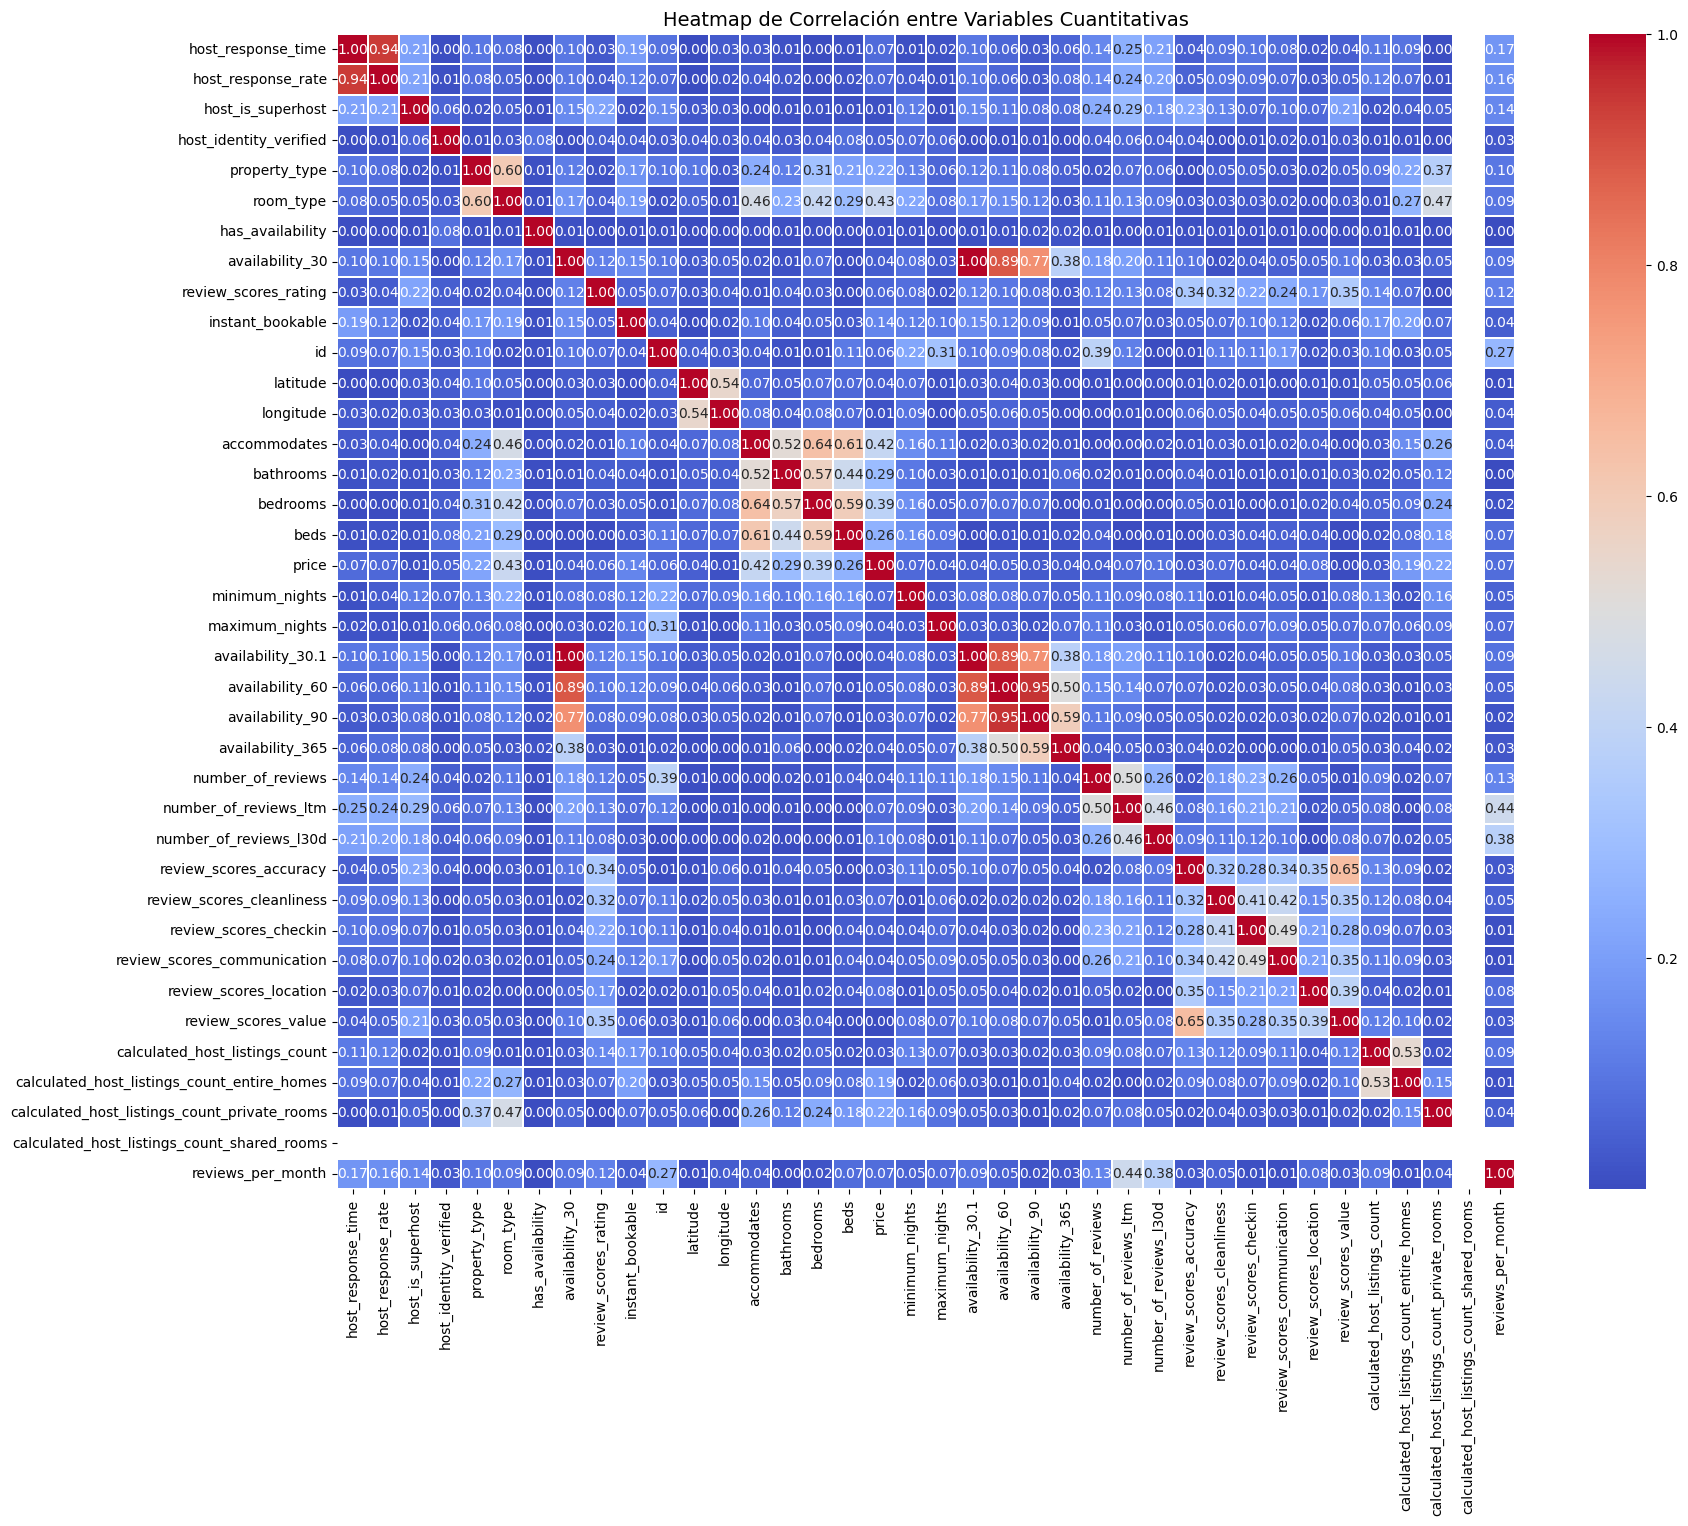

In [8]:
df1_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df1_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

In [9]:
#verificar los valores sin repetirse de una columna 
unico = np.unique(df['room_type'])
unico
conteo = df["room_type"].value_counts()  # Cuenta por categoría
conteo

room_type
Entire home/apt    8902
Private room       3239
Shared room         382
Hotel room           86
Name: count, dtype: int64

In [10]:
unico = np.unique(df['property_type'])
unico

array(['Boat', 'Camper/RV', 'Casa particular', 'Castle', 'Cave',
       'Earthen home', 'Entire bungalow', 'Entire cabin', 'Entire condo',
       'Entire cottage', 'Entire guest suite', 'Entire guesthouse',
       'Entire home', 'Entire home/apt', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Farm stay', 'Houseboat', 'Lighthouse', 'Private room',
       'Private room in bed and breakfast', 'Private room in boat',
       'Private room in bungalow', 'Private room in casa particular',
       'Private room in condo', 'Private room in cottage',
       'Private room in dome', 'Private room in farm stay',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in home', 'Private room in hostel',
       'Private room in hut', 'Private room in loft',
       'Private room in nature lodge', 'Private room in rental unit',
       'Private room in ser

In [11]:
#Convertimos la variable dependiente a dicotómica
df['room_type']= df['room_type'].replace(["Hotel room", "Shared room", "Private room"], "No Entire")

#convertimos host_response_time en dicotómica 
df['host_response_time']=df['host_response_time'].replace(["within an hour", "within a few hours", "within a day"], "Rapida")
df['host_response_time']=df['host_response_time'].replace(["a few days or more", "Desconocido"], "No rapida")

# Para convertir property_type. Listas de palabras clave para clasificar
entire_place_keywords = [
    'Entire', 'Boat', 'Campsite', 'Castle', 'Dome', 
    'Earthen home', 'Farm stay', 'Holiday park', 
    'Hut', 'Tiny home', 'Tower', 'Shipping container', 'Tent'
]
# Aquí asumimos que el resto se clasifica como "Room"

# Función para asignar una única categoría
def categorize_property(property_type):
    # Si se encuentra alguna palabra clave en entire_place_keywords, se clasifica como 'Entire Place'
    if any(keyword in property_type for keyword in entire_place_keywords):
        return 'Entire Place'
    # Si no, se asigna 'No Entire'
    else:
        return 'No Entire'

# Aplicar la función a la columna property_type para crear una nueva columna
df['property_type'] = df['property_type'].apply(categorize_property)

# Convertir la columna 'host_response_rate' a dicotómica 
# Función para limpiar y convertir los valores
def clean_and_convert(value):
    if value == '-' or value is None:  # Tratamos -% como valor bajo 
        return -1 
    try:
        return float(value.replace('%', '')) 
    except ValueError:
        return None  

df['host_response_rate_num'] = df['host_response_rate'].apply(clean_and_convert)
def categorize_response_rate(value):
    if value < 50:  
        return 'Respuesta baja'
    else:  
        return 'Respuesta alta'
df['host_response_rate'] = df['host_response_rate_num'].apply(categorize_response_rate)

#minimum nights
def categorize_minimum_nights(value):
    if value < 2:
        return 'Bajo'
    else:
        return 'Alto'

df['minimum_nights'] = df['minimum_nights'].apply(categorize_minimum_nights)

#maximum nights
def categorize_maximum_nights(value):
    if value < 201:
        return 'Bajo'
    else:
        return 'Alto'

df['maximum_nights'] = df['maximum_nights'].apply(categorize_maximum_nights)


df

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate_num
0,https://www.airbnb.com/rooms/50188,Cosy fully renovated farmhouse Gozo,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,Alexandra,2015-09-29,No rapida,Respuesta alta,f,...,4.95,4.95,4.62,4.79,1.0,1.0,0.0,0.0,1.32,NaN
1,https://www.airbnb.com/rooms/53723,Studio apartment Apt.3,A tastefully converted open plan apartment who...,"Located right in the heart of Valletta, a worl...",https://a0.muscache.com/pictures/1eeb37c2-16f6...,Michael,2010-10-02,Rapida,Respuesta alta,t,...,4.95,4.97,4.97,4.69,4.0,4.0,0.0,0.0,1.09,100.0
2,https://www.airbnb.com/rooms/102120,4 Bedroom Family-run House with Pool,Air conditioning in 3 bedrooms (on a pay-per-u...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,Michael,2011-04-25,Rapida,Respuesta alta,t,...,4.89,4.93,4.52,4.80,7.0,7.0,0.0,0.0,0.31,94.0
3,https://www.airbnb.com/rooms/109123,Penthouse Apartment.,Our place is located in a small town called Na...,I can tell where the best places are for break...,https://a0.muscache.com/pictures/724159/6277e4...,Lino And Rose,2011-05-05,Rapida,Respuesta alta,t,...,4.96,4.94,4.82,4.90,3.0,3.0,0.0,0.0,0.79,100.0
4,https://www.airbnb.com/rooms/113998,Residence Rouge™ 1 Floriana Valletta.,Hi and welcome to Residence Rouge.<br />Our 20...,No se proporcionan detalles,https://a0.muscache.com/pictures/744058/a7f0aa...,Alan,2011-05-11,No rapida,Respuesta baja,f,...,4.84,4.91,4.80,4.69,7.0,7.0,0.0,0.0,1.25,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,https://www.airbnb.com/rooms/1250641868583792839,Chic 3BR Apartment Steps from the Waterfront,"Welcome to our brand new 3 bedroom apartment, ...",Sliema is a town located on the northeast coas...,https://a0.muscache.com/pictures/prohost-api/H...,Aaron,2012-05-23,Rapida,Respuesta alta,f,...,5.00,5.00,4.70,4.60,8.8,4.5,0.9,0.0,1.20,100.0
12605,https://www.airbnb.com/rooms/1250684750467079656,Private suit room with batroom,Close to bugibba square,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Necati,2020-09-06,Rapida,Respuesta alta,t,...,5.00,5.00,4.70,4.60,2.0,0.0,2.0,0.0,1.20,94.0
12606,https://www.airbnb.com/rooms/1250764883436219740,Modern place 1 min to Sliema sea,Welcome to our cozy 50sqm apartment!<br />Loca...,No se proporcionan detalles,https://a0.muscache.com/pictures/93f98145-79ca...,Terence,2014-04-09,Rapida,Respuesta alta,f,...,5.00,5.00,4.70,4.60,1.0,1.0,0.0,0.0,1.20,100.0
12607,https://www.airbnb.com/rooms/1250802874295374756,Harbourfront living at its best!,"Birgu, also known as Vittoriosa, is one of the...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Denise,2022-02-11,Rapida,Respuesta alta,t,...,5.00,5.00,4.70,4.60,3.0,3.0,0.0,0.0,1.20,100.0


In [12]:
unico = np.unique(df['property_type'])
unico

array(['Entire Place', 'No Entire'], dtype=object)

In [13]:
unico = np.unique(df['host_response_rate'])
unico

array(['Respuesta alta', 'Respuesta baja'], dtype=object)

In [14]:
unico = np.unique(df['minimum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

In [15]:
unico = np.unique(df['maximum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

**Lineal**

In [16]:
#definimos variables independientes
Vars_Indep1 = df[['number_of_reviews', 'number_of_reviews_ltm']]
Vars_Indep2 = df[['availability_365', 'availability_90', 'availability_60']]
Vars_Indep3 = df[['availability_365', 'number_of_reviews_ltm']]
Vars_Indep4 = df[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']]
Vars_Indep5 = df[['calculated_host_listings_count_private_rooms', 'accommodates']]
Vars_Indep6 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep7 = df[['review_scores_value', 'availability_30']]
Vars_Indep8 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep9 = df[['number_of_reviews_ltm' ,'calculated_host_listings_count', 'reviews_per_month']]
Vars_Indep10 = df[['number_of_reviews', 'availability_365']]

In [17]:
#Definimos variables dependientes 
#Dicotómicas por naturaleza 
Var_Dep1 = df['host_is_superhost']
Var_Dep2 = df['host_identity_verified']
Var_Dep3 = df['has_availability']
Var_Dep4 = df['instant_bookable']
#Convertidas a dicotómicas 
Var_Dep5 = df['room_type']
Var_Dep6 = df['host_response_time']
Var_Dep7 = df['minimum_nights']
Var_Dep8 = df['property_type']
Var_Dep9 = df['host_response_rate']
Var_Dep10 = df['maximum_nights']

In [18]:
#Redefinimos las variables 
X1= Vars_Indep1
y1= Var_Dep1

X2= Vars_Indep2
y2= Var_Dep2

X3= Vars_Indep3
y3= Var_Dep3

X4= Vars_Indep4
y4= Var_Dep4

X5= Vars_Indep5
y5= Var_Dep5

X6= Vars_Indep6
y6= Var_Dep6

X7= Vars_Indep7
y7= Var_Dep7

X8= Vars_Indep8
y8= Var_Dep8

X9= Vars_Indep9
y9= Var_Dep9

X10 = Vars_Indep10
y10 = Var_Dep10


In [19]:
#Dividimos el conjutno de datos en la parte de entrenamiento y prueba: 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=None)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=None)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=None)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=None)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=None)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=None)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=None)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=None)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=None)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=None)

In [20]:
#Se escalan todos los datos 
escalar1 = StandardScaler()
escalar2 = StandardScaler()
escalar3 = StandardScaler()
escalar4 = StandardScaler()
escalar5 = StandardScaler()
escalar6 = StandardScaler()
escalar7 = StandardScaler()
escalar8 = StandardScaler()
escalar9 = StandardScaler()
escalar10 = StandardScaler()

In [21]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba utilizaremos: 
X1_train = escalar1.fit_transform(X1_train)
X1_test = escalar1.transform(X1_test)

X2_train = escalar2.fit_transform(X2_train)
X2_test = escalar2.transform(X2_test)

X3_train = escalar3.fit_transform(X3_train)
X3_test = escalar3.transform(X3_test)

X4_train = escalar4.fit_transform(X4_train)
X4_test = escalar4.transform(X4_test)

X5_train = escalar5.fit_transform(X5_train)
X5_test = escalar5.transform(X5_test)

X6_train = escalar6.fit_transform(X6_train)
X6_test = escalar6.transform(X6_test)

X7_train = escalar7.fit_transform(X7_train)
X7_test = escalar7.transform(X7_test)

X8_train = escalar8.fit_transform(X8_train)
X8_test = escalar8.transform(X8_test)

X9_train = escalar9.fit_transform(X9_train)
X9_test = escalar9.transform(X9_test)

X8_train = escalar10.fit_transform(X10_train)
X8_test = escalar10.transform(X10_test)

In [22]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo1 = LogisticRegression()
algoritmo2 = LogisticRegression()
algoritmo3 = LogisticRegression()
algoritmo4 = LogisticRegression()
algoritmo5 = LogisticRegression()
algoritmo6 = LogisticRegression()
algoritmo7 = LogisticRegression()
algoritmo8 = LogisticRegression()
algoritmo9 = LogisticRegression()
algoritmo10 = LogisticRegression()

In [23]:
#entrenamos el modelo 
algoritmo1.fit(X1_train, y1_train)
algoritmo2.fit(X2_train, y2_train)
algoritmo3.fit(X3_train, y3_train)
algoritmo4.fit(X4_train, y4_train)
algoritmo5.fit(X5_train, y5_train)
algoritmo6.fit(X6_train, y6_train)
algoritmo7.fit(X7_train, y7_train)
algoritmo8.fit(X8_train, y8_train)
algoritmo9.fit(X9_train, y9_train)
algoritmo10.fit(X10_train, y10_train)

LogisticRegression()

**host_is_superhost**

In [24]:
#Realizamos una predicción 
y1_pred = algoritmo1.predict(X1_test)
y1_pred

array(['f', 'f', 'f', ..., 'f', 'f', 't'], shape=(3783,), dtype=object)

In [25]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz1 = confusion_matrix(y1_test, y1_pred)
print('Matriz de Confusión: ')
print (matriz1)

Matriz de Confusión: 
[[2470  188]
 [ 866  259]]


In [26]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision1 = precision_score(y1_test, y1_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.5794183445190156


In [27]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud1 = accuracy_score(y1_test, y1_pred)
print('Exactitud del modelo:')
print(exactitud1)

Exactitud del modelo:
0.7213851440655564


In [28]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad1 = recall_score(y1_test, y1_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad1)

Sensibilidad del modelo:
0.9292701279157262


**host_identity_verified**

In [29]:
#Realizamos una predicción 
y2_pred = algoritmo2.predict(X2_test)
y2_pred

array(['t', 't', 't', ..., 't', 't', 't'], shape=(3783,), dtype=object)

In [30]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y2_test, y2_pred)
print('Matriz de Confusión: ')
print (matriz2)

Matriz de Confusión: 
[[   0   44]
 [   0 3739]]


In [31]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision2 = precision_score(y2_test, y2_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision2)

Precision del modelo:
0.9883690192968544


In [32]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y2_test, y2_pred)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.9883690192968544


In [33]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y2_test, y2_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.0


**has_availability**

In [34]:
#Realizamos una predicción 
y3_pred = algoritmo3.predict(X3_test)
y3_pred

array(['t', 't', 't', ..., 't', 't', 't'], shape=(3783,), dtype=object)

In [35]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz3 = confusion_matrix(y3_test, y3_pred)
print('Matriz de Confusión: ')
print (matriz3)

Matriz de Confusión: 
[[3783]]


c:\Users\josse\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [36]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision3 = precision_score(y3_test, y3_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision3)

Precision del modelo:
1.0


In [37]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y3_test, y3_pred)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
1.0


In [38]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad3 = recall_score(y3_test, y3_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
0.0


c:\Users\josse\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**instant_bookable**

In [39]:
#Realizamos una predicción 
y4_pred = algoritmo4.predict(X4_test)
y4_pred

array(['f', 't', 'f', ..., 't', 't', 't'], shape=(3783,), dtype=object)

In [40]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y4_test, y4_pred)
print('Matriz de Confusión: ')
print (matriz4)

Matriz de Confusión: 
[[ 790  854]
 [ 444 1695]]


In [41]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision4 = precision_score(y4_test, y4_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.5794183445190156


In [42]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y4_test, y4_pred)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.6568860692572033


In [43]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad4 = recall_score(y4_test, y4_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
0.4805352798053528


**room_type**

In [44]:
#Realizamos una predicción 
y5_pred = algoritmo5.predict(X5_test)
y5_pred

array(['No Entire', 'No Entire', 'Entire home/apt', ..., 'No Entire',
       'Entire home/apt', 'Entire home/apt'], shape=(3783,), dtype=object)

In [45]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz5 = confusion_matrix(y5_test, y5_pred)
print('Matriz de Confusión: ')
print (matriz5)

Matriz de Confusión: 
[[2531  133]
 [ 117 1002]]


In [46]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision5 = precision_score(y5_test, y5_pred, average="binary", pos_label="Entire home/apt")
print('Precision del modelo:')
print(precision5)

Precision del modelo:
0.9558157099697885


In [47]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y5_test, y5_pred)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.9339148823684906


In [48]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y5_test, y5_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.8954423592493298


**host_response_time**

In [49]:
#Realizamos una predicción 
y6_pred = algoritmo6.predict(X6_test)
y6_pred

array(['Rapida', 'Rapida', 'Rapida', ..., 'Rapida', 'Rapida', 'Rapida'],
      shape=(3783,), dtype=object)

In [50]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz6 = confusion_matrix(y6_test, y6_pred)
print('Matriz de Confusión: ')
print (matriz6)

Matriz de Confusión: 
[[   0  496]
 [   0 3287]]


In [51]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision6 = precision_score(y6_test, y6_pred, average="binary", pos_label="Rapida")
print('Precision del modelo:')
print(precision6)

Precision del modelo:
0.8688871266190854


In [52]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y6_test, y6_pred)
print('Exactitud del modelo:')
print(exactitud6)

Exactitud del modelo:
0.8688871266190854


In [53]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad6= recall_score(y6_test, y6_pred, average="binary", pos_label="No rapida")
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
0.0


**mimimun_nights**

In [54]:
#Realizamos una predicción 
y7_pred = algoritmo7.predict(X7_test)
y7_pred

array(['Alto', 'Alto', 'Alto', ..., 'Alto', 'Alto', 'Alto'],
      shape=(3783,), dtype=object)

In [55]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz7 = confusion_matrix(y7_test, y7_pred)
print('Matriz de Confusión: ')
print (matriz7)

Matriz de Confusión: 
[[2429   34]
 [1301   19]]


In [56]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision7 = precision_score(y7_test, y7_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision7)

Precision del modelo:
0.6512064343163538


In [57]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y7_test, y7_pred)
print('Exactitud del modelo:')
print(exactitud7)

Exactitud del modelo:
0.6471054718477399


In [58]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad7= recall_score(y7_test, y7_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad7)

Sensibilidad del modelo:
0.014393939393939395


**property_type**

In [59]:
#Realizamos una predicción 
y8_pred = algoritmo8.predict(X8_test)
y8_pred

array(['Entire Place', 'Entire Place', 'Entire Place', ...,
       'Entire Place', 'Entire Place', 'Entire Place'],
      shape=(3783,), dtype=object)

In [60]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz8 = confusion_matrix(y8_test, y8_pred)
print('Matriz de Confusión: ')
print (matriz8)

Matriz de Confusión: 
[[2652    0]
 [1131    0]]


In [61]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision8 = precision_score(y8_test, y8_pred, average="binary", pos_label="Entire Place")
print('Precision del modelo:')
print(precision8)

Precision del modelo:
0.7010309278350515


In [62]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y8_test, y8_pred)
print('Exactitud del modelo:')
print(exactitud8)

Exactitud del modelo:
0.7010309278350515


In [63]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad8= recall_score(y8_test, y8_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.0


**host_response_rate**

In [64]:
#Realizamos una predicción 
y9_pred = algoritmo9.predict(X9_test)
y9_pred

array(['Respuesta alta', 'Respuesta alta', 'Respuesta alta', ...,
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta'],
      shape=(3783,), dtype=object)

In [65]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz9 = confusion_matrix(y9_test, y9_pred)
print('Matriz de Confusión: ')
print (matriz9)

Matriz de Confusión: 
[[3677    0]
 [ 106    0]]


In [66]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision9 = precision_score(y9_test, y9_pred, average="binary", pos_label="Respuesta alta")
print('Precision del modelo:')
print(precision9)

Precision del modelo:
0.97197991012424


In [67]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y9_test, y9_pred)
print('Exactitud del modelo:')
print(exactitud9)

Exactitud del modelo:
0.97197991012424


In [68]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad9= recall_score(y9_test, y9_pred, average="binary", pos_label="Respuesta baja")
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.0


**maximum_nights**

In [69]:
#Realizamos una predicción 
y10_pred = algoritmo10.predict(X10_test)
y10_pred

array(['Alto', 'Alto', 'Alto', ..., 'Alto', 'Alto', 'Alto'],
      shape=(3783,), dtype=object)

In [70]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz10 = confusion_matrix(y10_test, y10_pred)
print('Matriz de Confusión: ')
print (matriz10)

Matriz de Confusión: 
[[2870    3]
 [ 910    0]]


In [71]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision10 = precision_score(y10_test, y10_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision10)

Precision del modelo:
0.7592592592592593


In [72]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y10_test, y10_pred)
print('Exactitud del modelo:')
print(exactitud10)

Exactitud del modelo:
0.7586571504097277


In [73]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad10= recall_score(y10_test, y10_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
0.0
